In [1]:
# used for cleaning and transforming the inputs inside the excel
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("inputs.xlsx")
df.dropna(axis=0, subset=["Date (mm-dd-yyyy)"], how="any", inplace=True)
df["Date (mm-dd-yyyy)"] = pd.to_datetime(df["Date (mm-dd-yyyy)"]).dt.strftime('%Y-%m-%d')
cleand_df = df.groupby("Date (mm-dd-yyyy)").sum()
cleand_df.to_excel("cleaned_inputs.xlsx")

<Axes: xlabel='Date (mm-dd-yyyy)'>

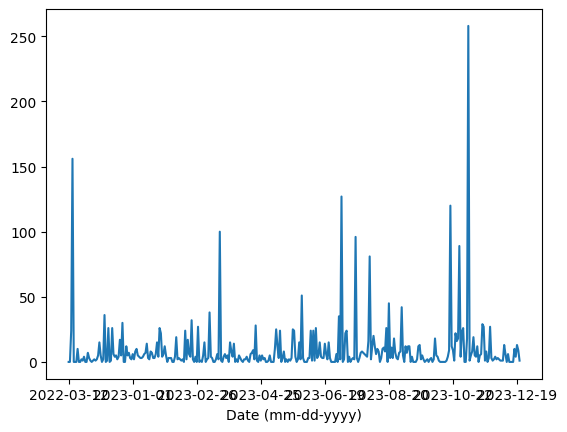

In [4]:
import matplotlib.pyplot as plt

cleand_df["400g Crystal"].plot()

In [47]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


def weighted_moving_average(a, window=3):
    weights = [(1 / window) for _ in range(1, window + 1)]
    return np.convolve(a, weights, mode="valid")


class LinearRegression:
    def __init__(self, x_vector, y_vector):
        self.x_vector = np.array(x_vector)
        self.y_vector = np.array(y_vector)

        self.w0 = 0
        self.w1 = 0

    def _get_predicted_value_matrix(self, x):
        formula = lambda x: self.w0 + self.w1 * x
        return formula(x)

    def _get_gradient_matrix(self):
        gradient_matrix = [
            sum((self.y_vector - self._get_predicted_value_matrix(self.x_vector))),
            sum(
                (self.y_vector - self._get_predicted_value_matrix(self.x_vector))
                * self.x_vector
            ),
        ]

        gradient_matrix = np.array(gradient_matrix) * -2

        return gradient_matrix

    def fit(self, step_size=0.001, num_iterations=10000):
        for i in range(1, num_iterations):
            gradient_matrix = self._get_gradient_matrix()
            self.w0 -= step_size * gradient_matrix[0]
            self.w1 -= step_size * gradient_matrix[1]

    def _show_coeffiecients(self):
        print(f"w0: {self.w0}\nw1: {self.w1}\n")

    def predict(self, x):
        y = self.w0 + self.w1 * x
        return y




In [46]:
x = [
    1,
    2,
    3,
]
y = [1, 2, 3]
model = LinearRegression(x, y)
model.fit(num_iterations=1000000)


print(model.y_vector)
print(model._get_predicted_value_matrix(model.x_vector))

[1 2 3]
[1.41979584 2.4568601  3.49392436]


In [6]:
import numpy as np

array=np.array([1,5,6])

In [9]:
np.insert(array,0,[45,55])

array([45, 55,  1,  5,  6])

In [5]:
import pandas as pd

df = pd.read_excel("cleaned_inputs.xlsx")
df["400g Crystal"]=df["400g Crystal"].apply(lambda x: 40 if x>40 else x)
df.to_excel("cleaned_inputs2.xlsx")

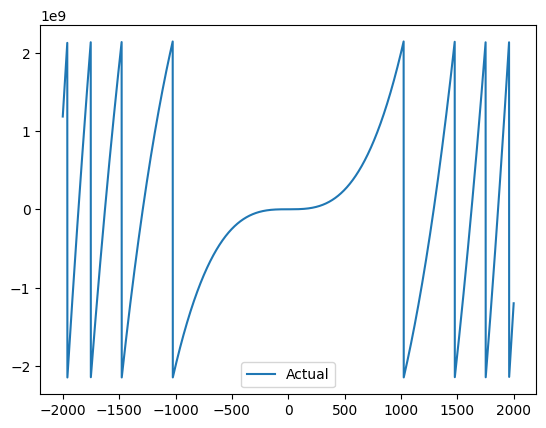

In [10]:
# Import the necessary modules
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt


# Generate some sample data
x = np.array(list(range(-2000, 2000)))
y = 2 * x**3 + (x**2) + 3 * x + 7  # quadratic function with some noise

# Reshape the data to fit the sklearn format
x = x.reshape(-1, 1)  # one column
y = y.reshape(-1, 1)  # one column

plt.plot(x, y, label="Actual")
plt.legend()
plt.show()